In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objs as go
import plotly.express as px

# Import necessary libraries for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import necessary libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Fields and Data Types 📱:


The dataset includes the following attributes:

- **User ID:** Unique identifier for each user.
- **Device Model:** Model of the user's smartphone.
- **Operating System:** The OS of the device (iOS or Android).
- **App Usage Time:** Daily time spent on mobile applications, measured in minutes.
- **Screen On Time:** Average hours per day the screen is active.
- **Battery Drain:** Daily battery consumption in mAh.
- **Number of Apps Installed:** Total apps available on the device.
- **Data Usage:** Daily mobile data consumption in megabytes.
- **Age:** Age of the user.
- **Gender:** Gender of the user (Male or Female).
- **User Behavior Class:** Classification of user behavior based on usage patterns (1 to 5).

In [3]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [4]:
# Descriptive statistics
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [5]:
# Display column names
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [6]:
# Renames the dataset columns and removes spaces
data = data.rename(columns={
    "User ID": "ID",
    "Device Model": "Model",
    "Operating System": "OS",
    "App Usage Time (min/day)": "UsageTime_min_per_day",
    "Screen On Time (hours/day)": "ScreenTime_hours_per_day",
    "Battery Drain (mAh/day)": "BatteryDrain_mAh_per_day",
    "Number of Apps Installed": "AppCount",
    "Data Usage (MB/day)": "DataUsage_MB_per_day",
    "User Behavior Class": "BehaviorClass"
})
data.head()

,ID,Model,OS,UsageTime_min_per_day,ScreenTime_hours_per_day,BatteryDrain_mAh_per_day,AppCount,DataUsage_MB_per_day,Age,Gender,BehaviorClass
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Handling missing data

In [7]:
# Verify the data
print(data.isnull().sum())

ID                          0
Model                       0
OS                          0
UsageTime_min_per_day       0
ScreenTime_hours_per_day    0
BatteryDrain_mAh_per_day    0
AppCount                    0
DataUsage_MB_per_day        0
Age                         0
Gender                      0
BehaviorClass               0
dtype: int64


# EDA (Exploratory Data Analysis)

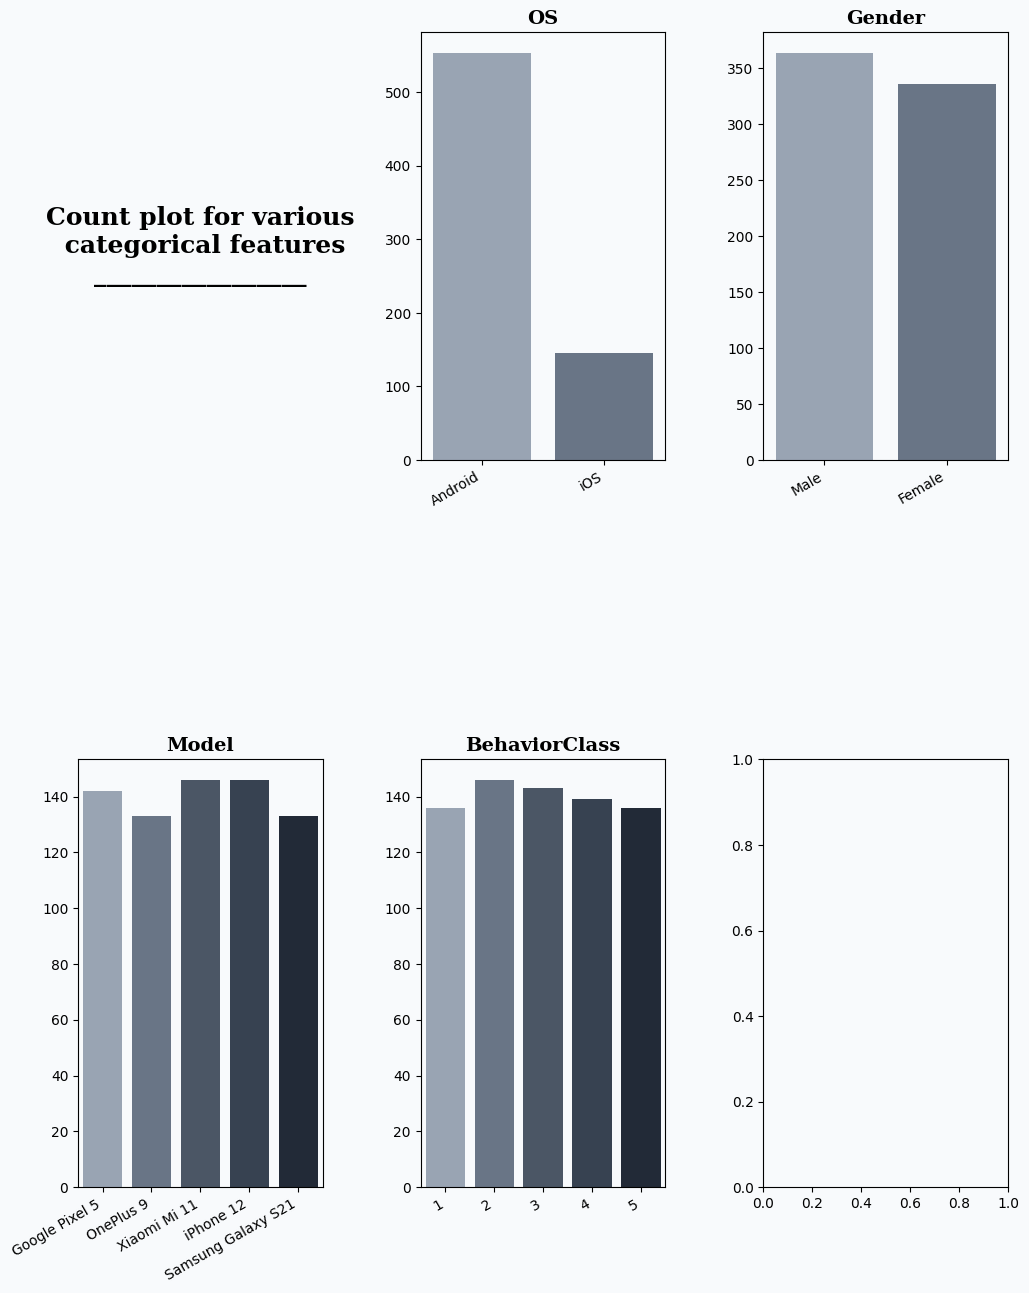

In [8]:
# Figure adjustments

# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(2, 3)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(2) for j in range(3)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['OS', 'Gender', 'Model', 'BehaviorClass']
titles = ["OS", "Gender", "Model", "BehaviorClass"]

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

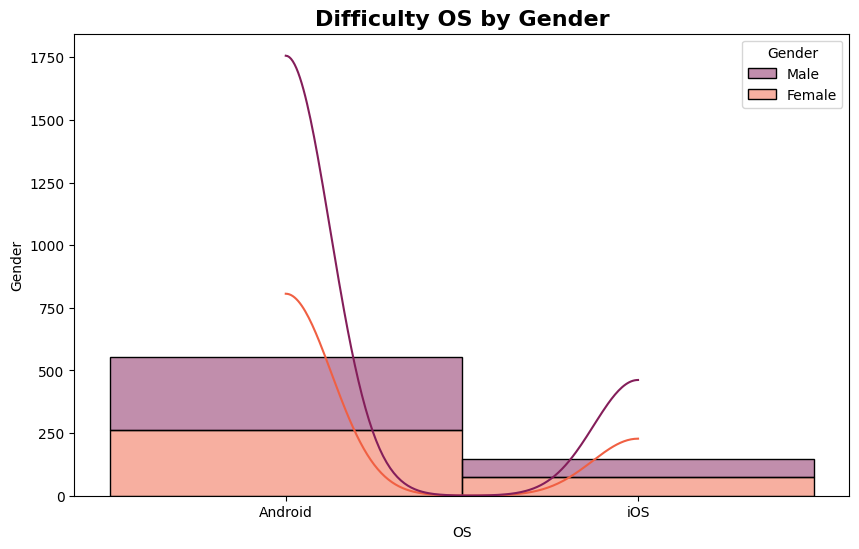

In [9]:
# OS by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='OS', hue='Gender', multiple='stack', palette='rocket', kde=True)
plt.title('Difficulty OS by Gender', fontsize=16, fontweight='bold')
plt.xlabel('OS')
plt.ylabel('Gender')
plt.show()

In [10]:
# Checking the uniqueness of 'Age'
unique_age = data['Age'].nunique()
print(f"Total unique age: {unique_age}")

Total unique age: 42


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

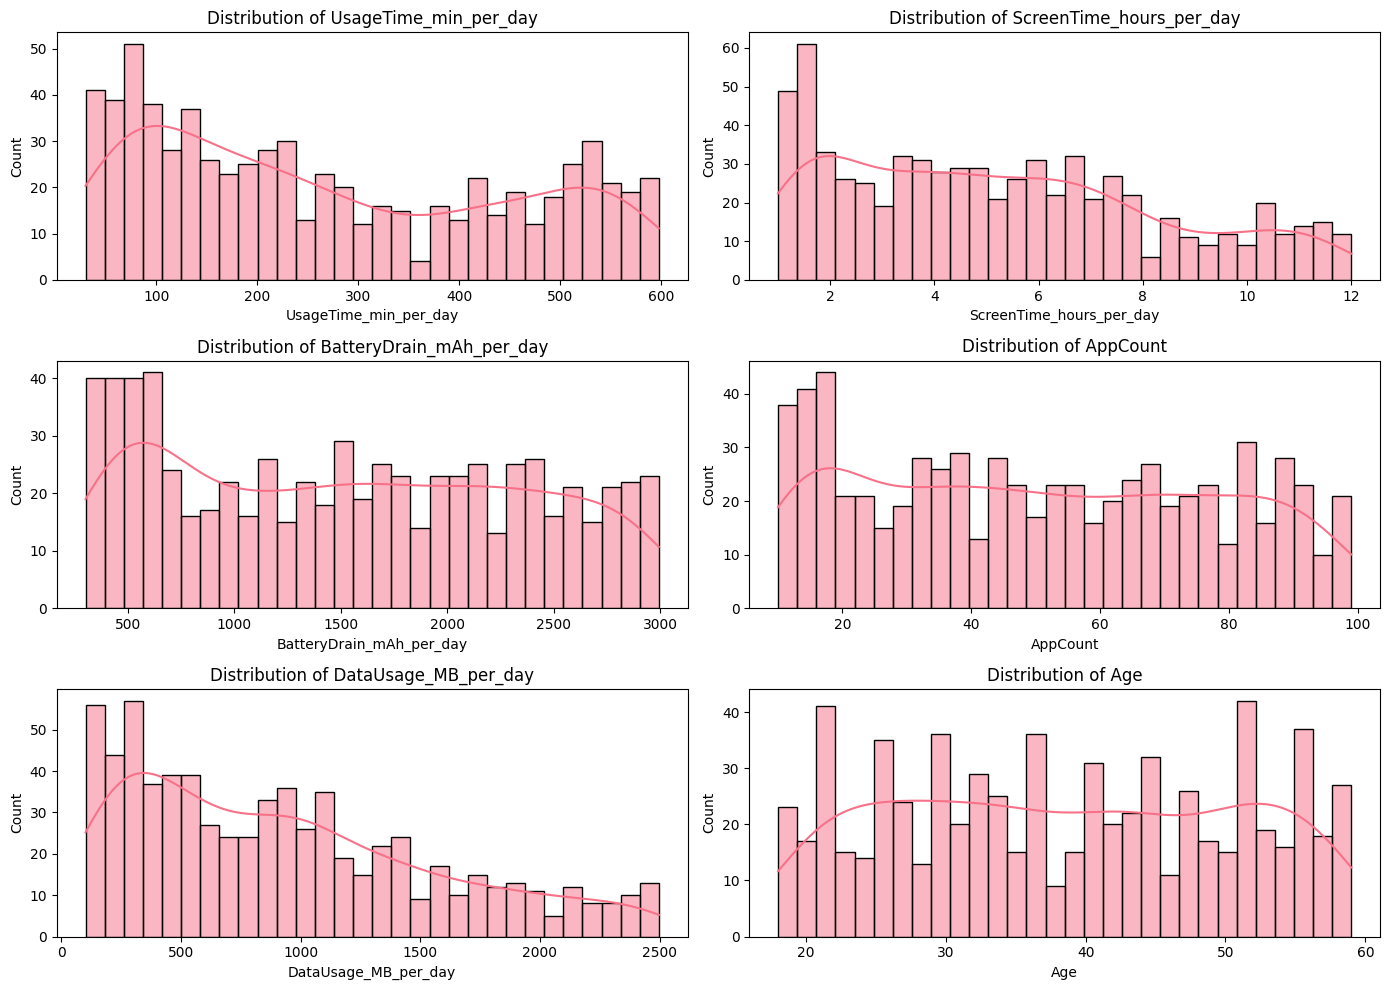

In [11]:
# Distribution plots for numeric variables
numeric_columns = ['UsageTime_min_per_day', 'ScreenTime_hours_per_day', 'BatteryDrain_mAh_per_day',
                   'AppCount', 'DataUsage_MB_per_day', 'Age']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, color=sns.color_palette('husl')[0], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

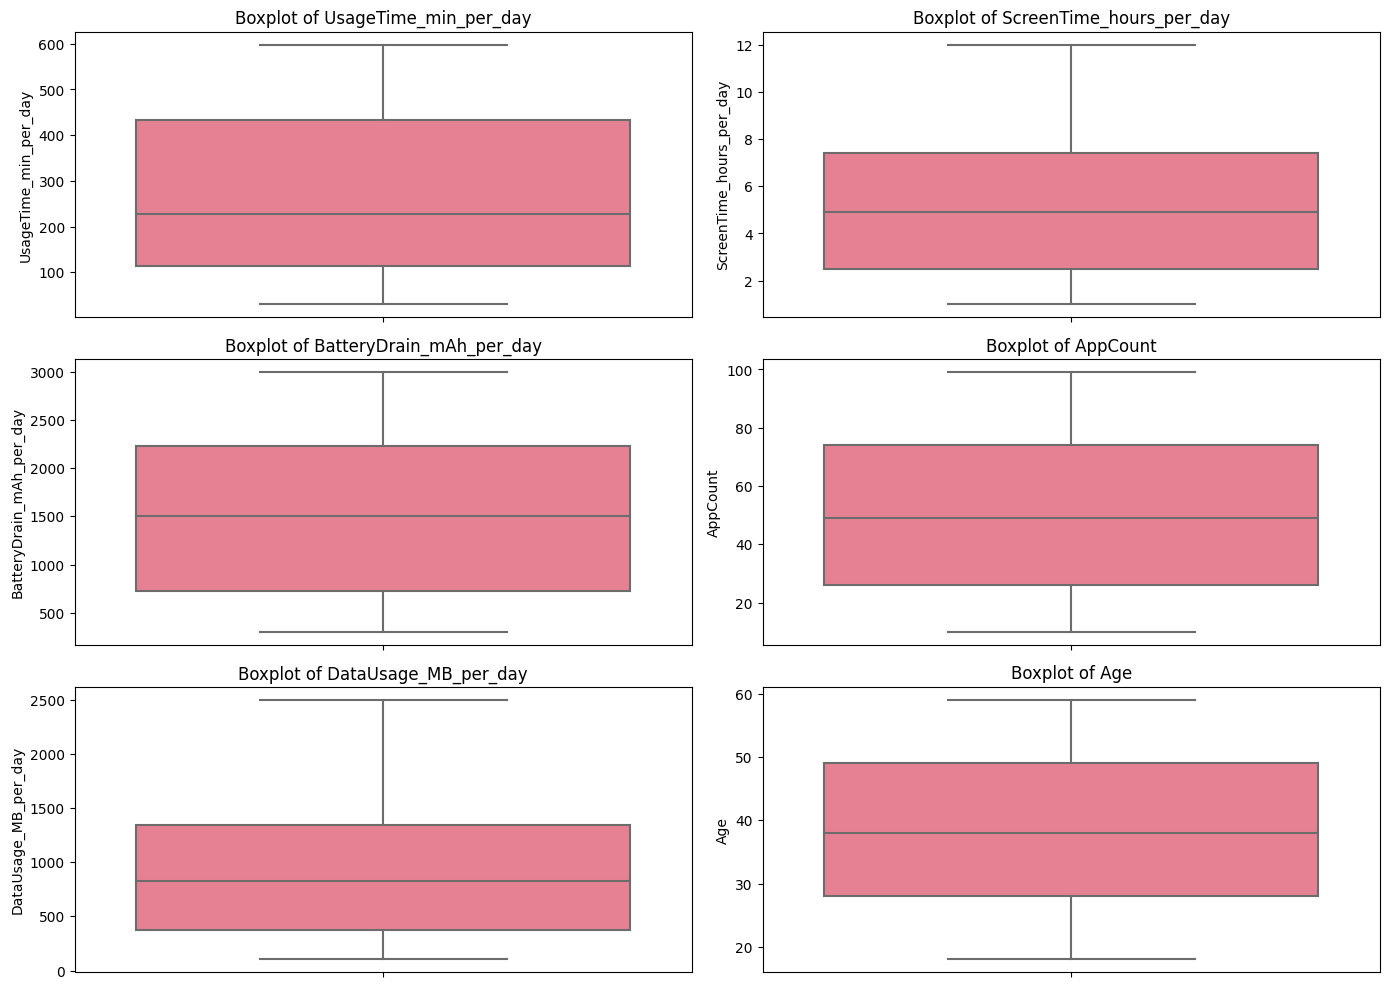

In [12]:
# Box plots for numeric variables to check for outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[col],color=sns.color_palette("husl")[0])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

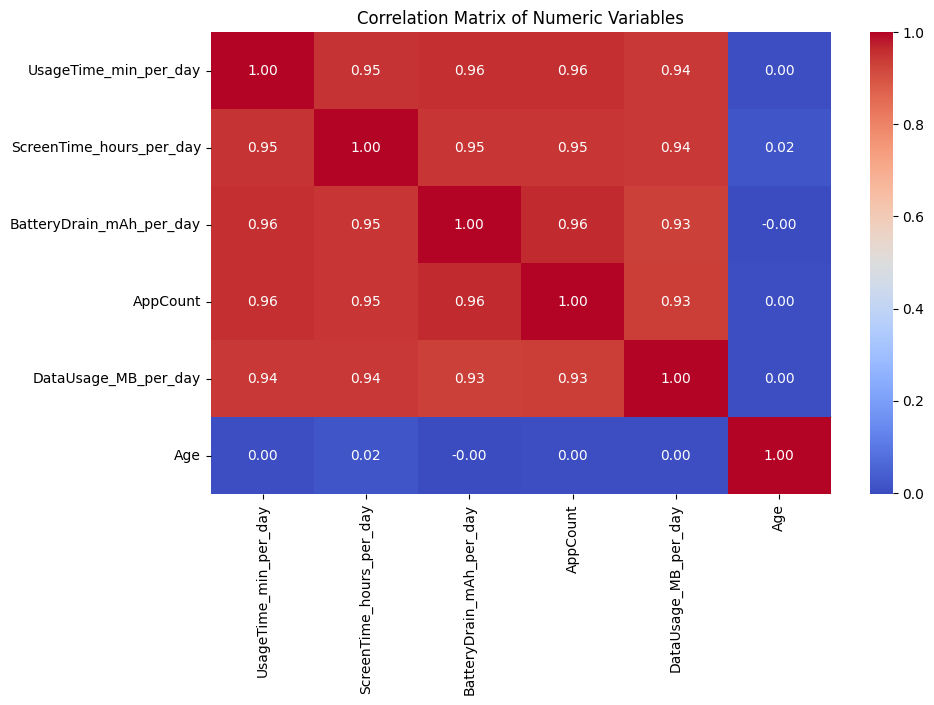

In [13]:
# Heatmap to visualize correlations among numeric variables
plt.figure(figsize=(10, 6))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

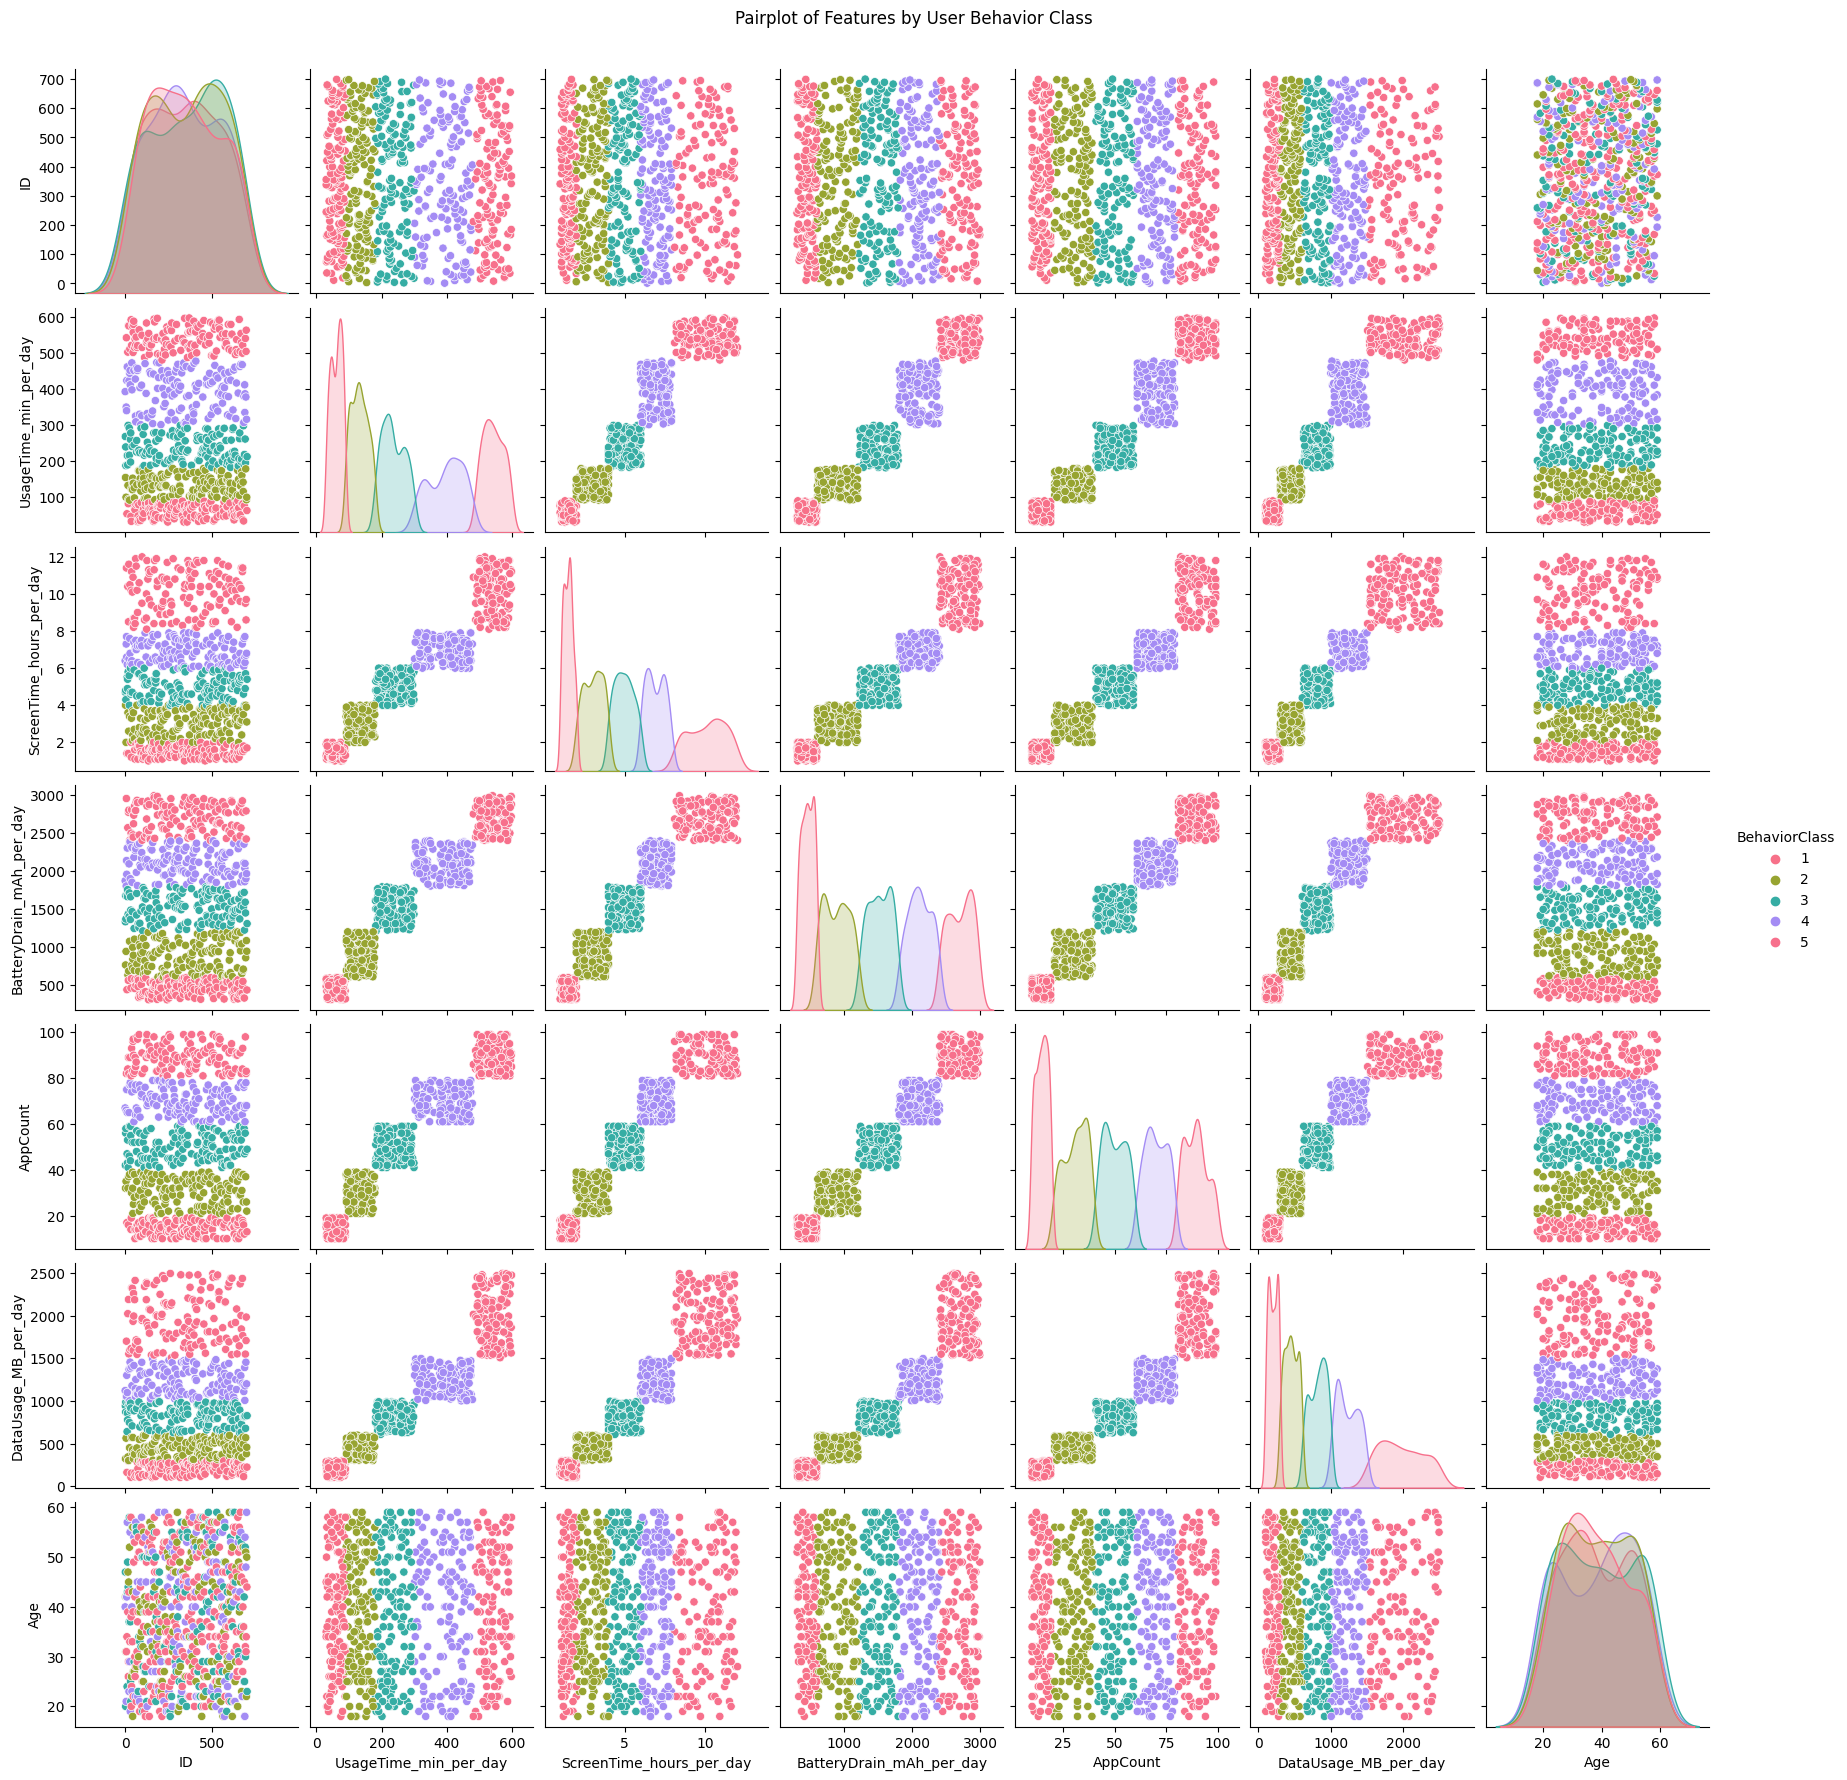

In [14]:
# Pairplot to identify potential relationships among variables
sns.pairplot(data, hue='BehaviorClass', palette="husl")
plt.suptitle("Pairplot of Features by User Behavior Class", y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

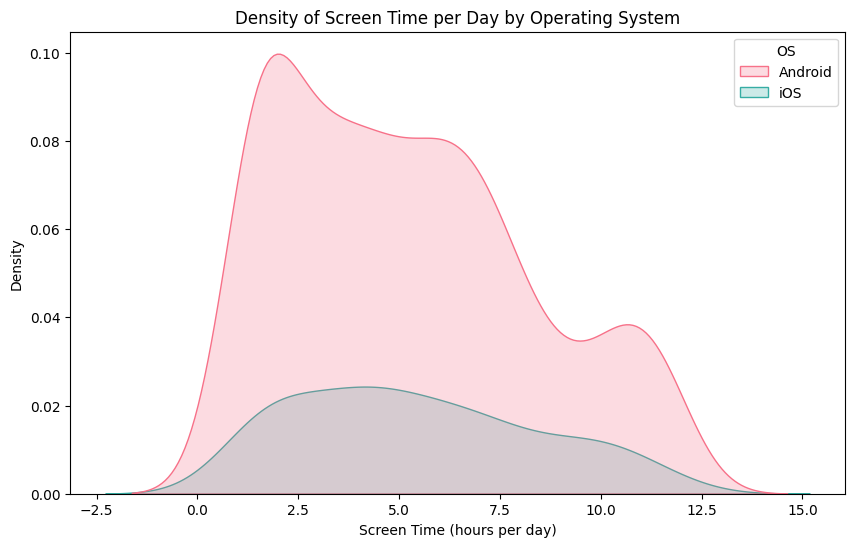

In [15]:
# KDE plots to show density distributions for 'ScreenTime_hours_per_day' segmented by 'OS'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='ScreenTime_hours_per_day', hue='OS', fill=True,palette="husl")
plt.title('Density of Screen Time per Day by Operating System')
plt.xlabel('Screen Time (hours per day)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


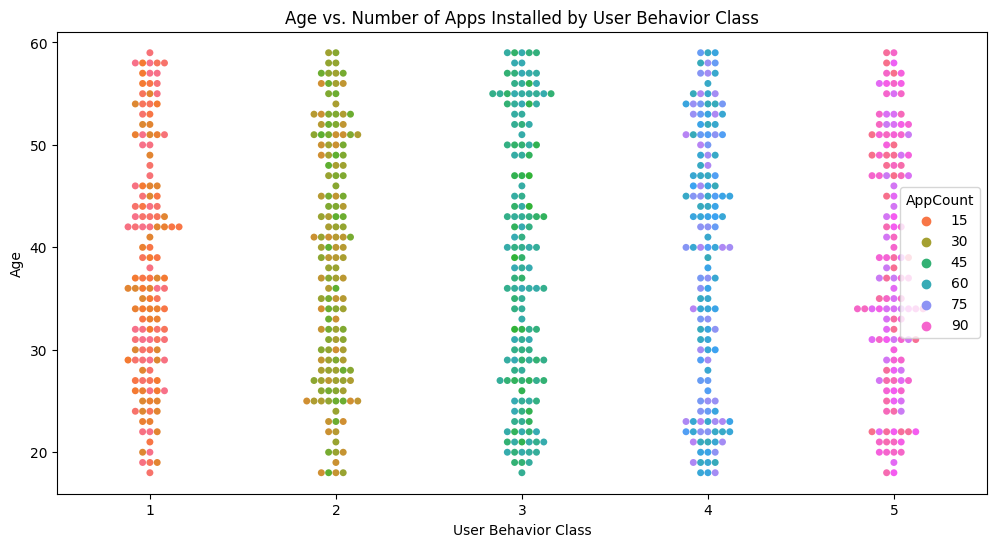

In [16]:
# Swarm plot for 'Age' vs. 'AppCount' segmented by 'BehaviorClass'
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data, x='BehaviorClass', y='Age', hue='AppCount', palette='husl', size=5)
plt.title('Age vs. Number of Apps Installed by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


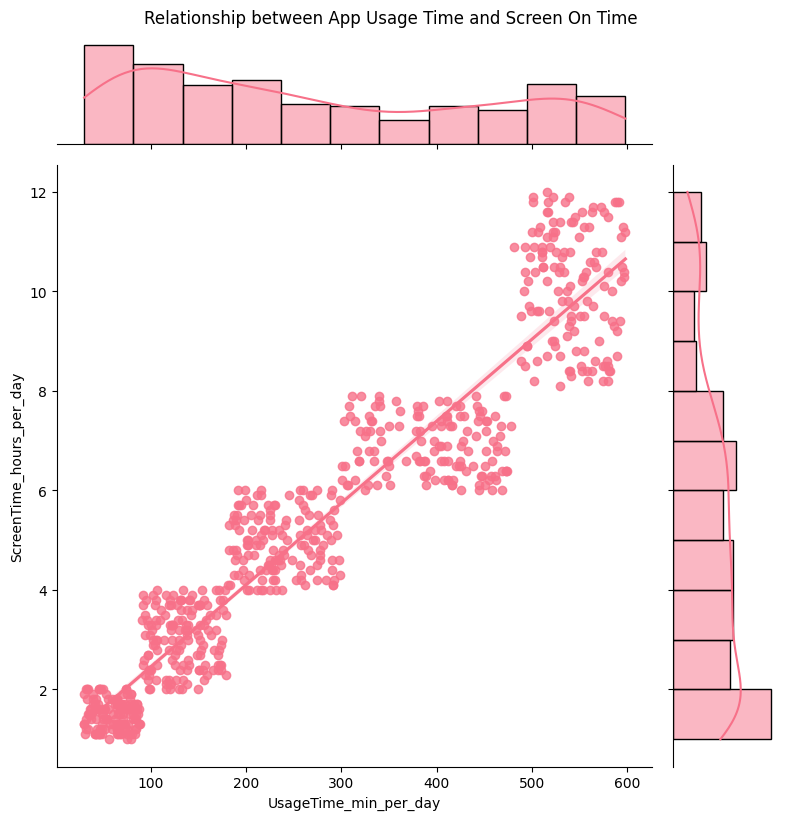

In [17]:
# Joint plot to show relationship between 'UsageTime_min_per_day' and 'ScreenTime_hours_per_day' with regression line
color = sns.color_palette("husl")[0]

sns.jointplot(data=data, x='UsageTime_min_per_day', y='ScreenTime_hours_per_day', kind='reg', height=8, color=color)
plt.suptitle("Relationship between App Usage Time and Screen On Time", y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

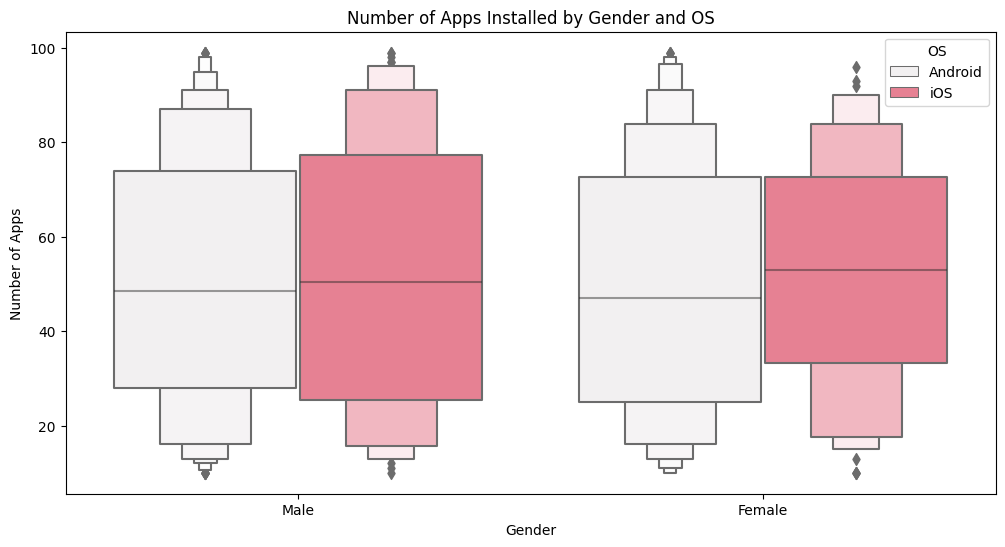

In [18]:
# Boxen plot for 'AppCount' segmented by 'Gender' and grouped by 'OS'
plt.figure(figsize=(12, 6))
sns.boxenplot(data=data, x='Gender', y='AppCount', hue='OS', color=color)
plt.title('Number of Apps Installed by Gender and OS')
plt.ylabel('Number of Apps')
plt.show()

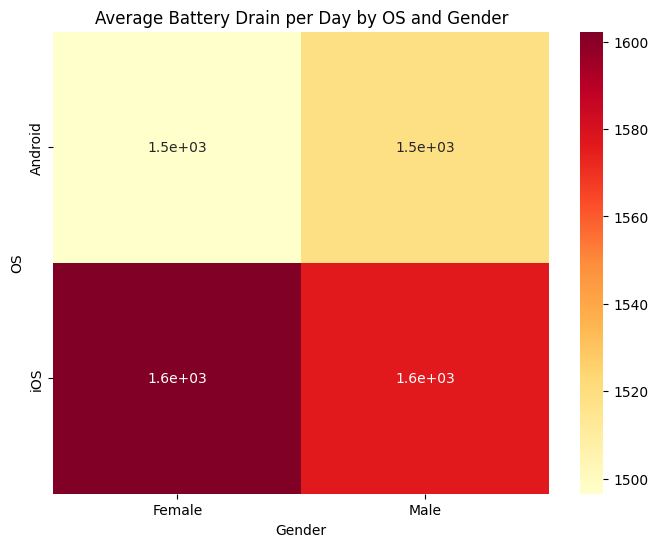

In [19]:
# Heatmap for the average 'BatteryDrain_mAh_per_day' per 'OS' and 'Gender'
pivot_table = data.pivot_table(values='BatteryDrain_mAh_per_day', index='OS', columns='Gender', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd')
plt.title('Average Battery Drain per Day by OS and Gender')
plt.show()

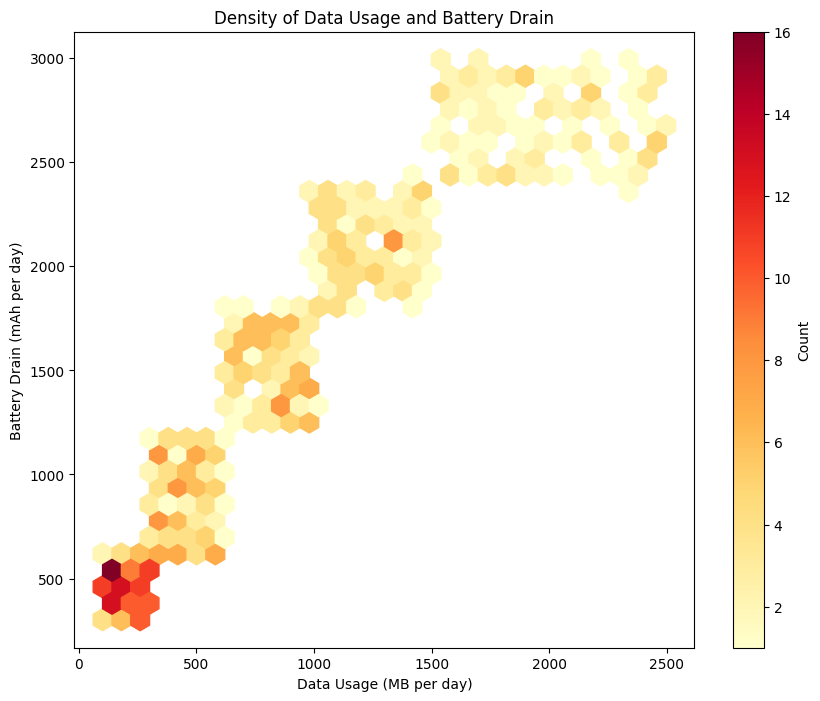

In [20]:
# Hexbin plot to observe the density of 'DataUsage_MB_per_day' and 'BatteryDrain_mAh_per_day'
plt.figure(figsize=(10, 8))
plt.hexbin(data['DataUsage_MB_per_day'], data['BatteryDrain_mAh_per_day'], gridsize=30, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Data Usage (MB per day)')
plt.ylabel('Battery Drain (mAh per day)')
plt.title('Density of Data Usage and Battery Drain')
plt.show()

# Model For Classification of User Behavior

In [21]:
# Convert categorical variables to numeric using get_dummies
data_encoded = pd.get_dummies(data, columns=["Model", "OS", "Gender"])

# Separating the target and features
X = data_encoded.drop(['ID', 'BehaviorClass'], axis=1)
y = data_encoded['BehaviorClass'] - 1

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with updated parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=300, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Training and evaluating models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Output model performance
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("=" * 50)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6523809523809524
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        46
           1       0.45      0.68      0.54        34
           2       0.54      0.56      0.55        50
           3       0.67      0.55      0.60        47
           4       0.77      0.82      0.79        33

    accuracy                           0.65       210
   macro avg       0.69      0.67      0.66       210
weighted avg       0.69      0.65      0.66       210

Confusion Matrix:
 [[33 13  0  0  0]
 [ 0 23 10  1  0]
 [ 0 15 28  6  1]
 [ 0  0 14 26  7]
 [ 0  0  0  6 27]]
Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00  

# Prediction of Battery Drain

In [22]:
# Convert categorical variables to numeric using get_dummies
data_encoded = pd.get_dummies(data, columns=["Model", "OS", "Gender"])

# Separating the target and features
X = data_encoded.drop(['ID', 'BatteryDrain_mAh_per_day'], axis=1)
y = data_encoded['BatteryDrain_mAh_per_day']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Training and evaluating models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Output model performance
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("=".center(50,"="))

Model: Linear Regression
Mean Squared Error: 28405.69309259372
Mean Absolute Error: 142.23480356557167
R^2 Score: 0.9560700813095121
Model: Random Forest
Mean Squared Error: 30778.56856714286
Mean Absolute Error: 147.75309523809523
R^2 Score: 0.9524003864240606
Model: Gradient Boosting
Mean Squared Error: 30562.08862601343
Mean Absolute Error: 145.10860775559794
R^2 Score: 0.952735176572674
Model: XGBoost
Mean Squared Error: 38511.2006115155
Mean Absolute Error: 160.9863712855748
R^2 Score: 0.9404417309578674
Model: K-Nearest Neighbors
Mean Squared Error: 33030.99923809524
Mean Absolute Error: 151.38666666666668
R^2 Score: 0.9489169616081846
